In [349]:
import pickle
import pickle
from typing import Dict, Tuple, Optional, List, Union

import numpy as np
import pandas as pd
from pyteomics import mass
from common import LYS, BSA, OVA

LIP = "DDNLVGGMTLDLPSDAPPISLSSSTNSASDGGKVVAATTAQIQEFTKYAGIAATAYCRSVVPGNKWDCVQCQKWVPDGKIITTFTSLLSDTNGYVLRSDKQKTIYLVFRGTNSFRSAITDIVFNFSDYKPVKGAKVHAGFLSSYEQVVNDYFPVVQEQLTAHPTYKVIVTGHSLGGAQALLAGMDLYQREPRLSPKNLSIFTVGGPRVGNPTFAYYVESTGIPFQRTVHKRDIVPHVPPQSFGFLHPGVESWIKSGTSNVQICTSEIETKDCSNSIVPFTSILDHLSYFDINEGSCL"

from precursor import Mod, Peptide, Residue, err_margin, compute_error, within_bounds

from fragments import MultiP

from measurement import read_mgf

import fragments as fr

# FRAGMENT_FILE = "../out/fragment_matches_lys_at_2_inter_bonds_newer.pickle"
# FRAGMENT_FILE = "../out/fragment_matches_lys_at_6_segments_2_breaks.pickle"
FRAGMENT_FILE = "../out/fragment_matches/LIP_AT_segments=3_breaks=2_error=15ppm.pickle"

from protein import trypsin

In [ ]:
# lysozym main SS
# 6,127
# 30,115
# 64,80
# 76,94
#
# BSA main SS
# 53,62
# 75,91
# 90,101
# 123,168
# 167,176
# 199,245
# 244,252
# 264,278
# 277,288
# 315,360
# 359,368
# 391,437
# 436,447
# 460,476
# 475,486
# 513,558
# 557,566
#
# lipase main SS
# 57,296
# 68,71
# 263,272
#
# ovalbumin main SS
# 73,120

In [350]:
fragments = []
with open(FRAGMENT_FILE, "rb") as f:
    while True:
        fragments.append(pickle.load(f))


EOFError: Ran out of input

In [351]:
df = pd.DataFrame(fragments)
df

,measurement,precursor,variants,multipeptide,bonds,match,fragment_id,fragment_mz,intensity,charge,total_intensity,score
0,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,WDCVQCQKWVPDGK,"((67, 70),)","{'seq': 'QK', 'ranges': [(71, 73)], 'mass': 23...",7,120.080632,5603.758301,2,728599.986816,0.007691
1,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,1,WDCVQCQKWVPDGK,"((67, 70),)","{'seq': 'K', 'ranges': [(72, 73)], 'mass': 128...",8,129.102374,10363.806641,1,728599.986816,0.014224
2,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,WDCVQCQKWVPDGK,"((67, 70),)","{'seq': 'K', 'ranges': [(78, 79)], 'mass': 128...",8,129.102374,10363.806641,1,728599.986816,0.014224
3,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,WDCVQCQKWVPDGK,"((67, 70),)","{'seq': 'K', 'ranges': [(78, 79)], 'mass': 146...",13,147.112492,2501.846191,1,728599.986816,0.003434
4,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,1,WDCVQCQKWVPDGK,"((67, 70),)","{'seq': 'WVPD', 'ranges': [(73, 77)], 'mass': ...",16,161.074793,4138.156738,3,728599.986816,0.005680
...,...,...,...,...,...,...,...,...,...,...,...,...
572,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,2,SVVPGNKWDCVQCQKWVPDGK+SGTSNVQICTSEIETK,"((67, 262),)","{'seq': 'SVVPGNKWDCVQCQKWVPD+NVQICTSEIETK', 'r...",23,1786.338085,3221.245605,2,68219.357300,0.047219
573,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,2,SVVPGNKWDCVQCQKWVPDGK+SGTSNVQICTSEIETK,"((67, 262),)","{'seq': 'VPGNKWDCVQCQKWVPDGK+NVQICTSEIETK', 'r...",23,1786.338085,3221.245605,2,68219.357300,0.047219
574,<measurement.PeptideMeasurement object at 0x49...,{'measurement': <measurement.PeptideMeasuremen...,2,SVVPGNKWDCVQCQKWVPDGK+SGTSNVQICTSEIETK,"((70, 262),)","{'seq': 'VQICTSEIETK', 'ranges': [(259, 270)],...",9,633.287340,3046.690674,2,39045.572510,0.078029
575,<measurement.PeptideMeasurement object at 0x4a...,{'measurement': <measurement.PeptideMeasuremen...,2,SVVPGNKWDCVQCQKWVPDGK+SGTSNVQICTSEIETK,"((70, 262),)","{'seq': 'CQKWVPDGK+SGTSNVQICTS', 'ranges': [(7...",10,712.670055,2605.413574,3,39045.572510,0.066728


In [20]:
import matplotlib.pyplot as plt


def histo(data):
    # An "interface" to matplotlib.axes.Axes.hist() method
    n, bins, patches = plt.hist(
        x=data,
        bins="auto",
        color="#0504aa",
        alpha=0.7,
        rwidth=0.85,
    )
    plt.grid(axis="y", alpha=0.75)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title("My Very Own Histogram")
    plt.text(23, 45, r"$\mu=15, b=3$")
    plt.xticks(rotation=90)
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    return plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


flattened = [(b[0] + 1, b[1] + 1) for m in df.bonds for b in m]
histo([str(b) for b in sorted(flattened)])

In [177]:
# From old fragment analysis
# ((6, 127), 13.346290121050531)
# ((30, 115), 7.283808779510653)
# ((94, 115), 4.902732231508441)
# ((30, 127), 4.175014297421382)
# ((6, 76), 3.5228414463338105)
# ((6, 115), 3.4146538279373413)
# ((80, 115), 2.652638582827121)
# ((76, 80), 1.8027670677845962)
# ((64, 127), 1.6640611786956967)
# ((94, 127), 1.6384830750559505)
# ((80, 127), 1.6018448515043544)
# ((76, 94), 1.5866929809330261)
# ((6, 64), 1.4861990294897955)
# ((64, 76), 1.171054578671526)
# ((6, 94), 1.1382788403829496)
# ((30, 76), 1.0597983564585203)
# ((6, 80), 1.0528272625199064)
# ((64, 115), 0.9401018143378905)
# ((115, 127), 0.9266341801551622)
# ((76, 127), 0.5575763428777898)
# ((30, 94), 0.48211151877450525)
# ((6, 30), 0.41906206956130065)
# ((76, 115), 0.3512598674841227)
# ((64, 94), 0.23690502620184029)
# ((30, 64), 0.23429644150417078)
# ((64, 80), 0.1591891546235903)
# ((80, 94), 0.031476791393323385)


[6276]

In [288]:
d = pd.DataFrame()

d["scan"] = [m.scan for m in df["measurement"]]
d["variant_seq"] = [str(m) for m in df["multipeptide"]]
d["variant_charge"] = [m.charge for m in df["measurement"]]
d["variant_bonds"] = ["+".join(str(r) for r in b) for b in df["bonds"]]
d["charge"] = df["charge"]
d["sequence"] = [m["seq"] for m in df["match"]]
d["matched_ranges"] = ["+".join(str(r) for r in m["ranges"]) for m in df["match"]]
d["mass"] = [m["mass"] for m in df["match"]]
d["connected_bonds"] = [
    "+".join(str(r) for r in m["connected_bonds"]) for m in df["match"]
]
d["disconnected_cys"] = [
    "+".join(str(c) for c in m["disconnected_cys"]) for m in df["match"]
]
d["interesting_disconnected_cys"] = [
    "+".join(str(c) for c in m["interesting_disconnected_cys"]) for m in df["match"]
]
d["alkylated_cys"] = [
    "+".join(
        str(c)
        for c in cysteines
        if c not in cys_in_bonds and any(b <= c < e for b, e in m["ranges"])
    )
    for m in df["match"]
]

d["match_error_ppm"] = [m["error"] for m in df["match"]]
d["target_mz"] = df["fragment_mz"]
df["fragment_id"] = df["fragment_id"]
d["intensity"] = df["intensity"]
d["total_intensity"] = df["total_intensity"]
d["variant_counts"] = [variant_counts.loc[m.scan, "variant"] for m in df["measurement"]]
d["mod_count"] = [len(m["mods"]) for m in df["match"]]
d["variant_probability"] = precursor_probabilities

d

,scan,variant_seq,variant_charge,variant_bonds,charge,sequence,matched_ranges,mass,connected_bonds,disconnected_cys,interesting_disconnected_cys,alkylated_cys,match_error_ppm,target_mz,intensity,total_intensity,variant_counts,mod_count,variant_probability
0,845,CELAAAMK+GCR,3,"(5, 126)",1,K,"(12, 13)",128.094963,,,,,1.748282,129.102564,183933.984375,1.233305e+07,1,1,8.994022e-03
1,845,CELAAAMK+GCR,3,"(5, 126)",1,K,"(12, 13)",129.078979,,,,,1.317575,130.086974,35642.941406,1.233305e+07,1,1,8.994022e-03
2,845,CELAAAMK+GCR,3,"(5, 126)",1,AA,"(8, 10)",142.074228,,,,,4.164735,143.081461,68101.820312,1.233305e+07,1,0,8.994022e-03
3,845,CELAAAMK+GCR,3,"(5, 126)",1,AA,"(9, 11)",142.074228,,,,,4.164735,143.081461,68101.820312,1.233305e+07,1,0,8.994022e-03
4,845,CELAAAMK+GCR,3,"(5, 126)",1,K,"(12, 13)",146.105528,,,,,4.439461,147.112704,114970.750000,1.233305e+07,1,0,8.994022e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201968,14392,CELAAAMKR+TPGSRNLCNIPCSALLSSDITASVNCAK+NRCK+GCRL,3,"(5, 93)+(75, 126)+(79, 114)",2,CELAAAMK+IPCSALLSSDITASVNCAK+NRCK,"(5, 13)+(77, 96)+(112, 116)",3189.511303,"(5, 93)+(79, 114)",,,79+93+114,3.941961,1595.769763,1367.881592,2.810368e+04,12,2,8.627736e-10
201969,14392,CELAAAMKR+TPGSRNLCNIPCSALLSSDITASVNCAK+NRCK+GCRL,3,"(5, 93)+(75, 126)+(79, 114)",2,TPGSRNLCNIPCSALLSSDITAS+NRCK+CRL,"(68, 91)+(112, 116)+(126, 129)",3189.515143,"(75, 126)+(79, 114)",,,75+79+114,2.738165,1595.769763,1367.881592,2.810368e+04,12,1,8.627736e-10
201970,14392,CELAAAMKR+TPGSRNLCNIPCSALLSSDITASVNCAK+NRCK+GCRL,3,"(5, 93)+(75, 126)+(79, 114)",2,TPGSRNLCNIPCSALLSSDITASVN+NRCK+GC,"(68, 93)+(112, 116)+(125, 127)",3189.478757,"(75, 126)+(79, 114)",,,75+79+114,14.146176,1595.769763,1367.881592,2.810368e+04,12,0,8.627736e-10
201971,14392,CELAAAMKR+TPGSRNLCNIPCSALLSSDITASVNCAK+NRCK+GCRL,3,"(5, 93)+(75, 126)+(79, 114)",2,TPGSRNLCNIPCSALLSSDITASVN+CK+GCRL,"(68, 93)+(114, 116)+(125, 129)",3189.503909,"(75, 126)+(79, 114)",,,75+79+114,6.260161,1595.769763,1367.881592,2.810368e+04,12,1,8.627736e-10


In [289]:
d.to_csv("../out/csv/fragment_matches.csv", index_label="id", sep=";")

In [352]:
precursor_matches = []
with open("../out/precursor_matches/LIP_AT_segments=3_error=15ppm.pickle", "rb") as f:
    while True:
        precursor_matches.append(pickle.load(f))

EOFError: Ran out of input

In [274]:
from pyteomics.mass import calculate_mass

precursor_matches_df = pd.DataFrame(precursor_matches)
precursor_matches_df["spectrum_id"] = [
    m.id for m in precursor_matches_df["measurement"]
]
precursor_matches_df["scan"] = [m.scan for m in precursor_matches_df["measurement"]]
precursor_matches_df["my_mz"] = [
    (m / msmnt.charge) + calculate_mass(formula="H")
    for m, msmnt in zip(
        precursor_matches_df["mass"], precursor_matches_df["measurement"]
    )
]
precursor_matches_df = precursor_matches_df[
    [
        "spectrum_id",
        "scan",
        "my_mz",
        "error",
        "sequence",
        "mods",
        "cys_bonds",
        "missed_cleavages",
    ]
]

precursor_matches_df = precursor_matches_df.rename(
    columns={
        "error": "my_error_ppm",
        "sequence": "my_sequence",
        "mods": "my_mods",
        "missed_cleavages": "my_missed_cleavages",
    }
)
precursor_matches_df = precursor_matches_df.set_index("spectrum_id")
precursor_matches_df

,scan,my_mz,my_error_ppm,my_sequence,my_mods,cys_bonds,my_missed_cleavages
spectrum_id,,,,,,,
57,845,395.512748,0.174978,CELAAAMK+GCR,"(Mod(description='Met Oxidation', mass=15.9949),)",1,0
58,846,515.763038,0.046331,RHGLDNYR,(),0,1
60,848,592.765210,0.701278,CELAAAMK+GCR,"(Mod(description='Met Oxidation', mass=15.9949),)",1,0
61,849,367.170211,0.456531,CELAAAMK+CK,"(Mod(description='Met Oxidation', mass=15.9949),)",1,0
64,852,413.872281,0.363565,CELAAAMKR+CK,(),1,1
...,...,...,...,...,...,...,...
12451,14365,1829.585656,6.896548,KVFGRCELAAAMK+NLCNIPCSALLSSDITASVNCAKK+NRCKGTD...,"(Mod(description='Alkylated Cys', mass=57.0214),)",2,2
12462,14380,727.314786,4.079902,WWCNDGR+NRCK,(),1,1
12470,14392,1596.434180,3.764523,CELAAAMK+NLCNIPCSALLSSDITASVNCAK+NRCKGTDVQAWIR,"(Mod(description='Met Oxidation', mass=15.9949...",2,2


In [349]:
from pymzid.read_mzid import Mzid
from fragments import compute_error

mgf_id = Mzid("../data/mgf/190318_LYS_RAT_50x_05.mzid")
mgf_id.read_psm()
msgf_matches_df = mgf_id.psm_df

msgf_matches_df.head(30)

Reading peptide spectrum matches: 100%|█████████▉| 1217/1218 [00:00<00:00, 42781.09it/s]


,sir_id,spectrum_id,pe_id,sii_id,z,mz,calc_mz,pep_id,pass_threshold,rank,MS-GF:RawScore,MS-GF:DeNovoScore,MS-GF:SpecEValue,MS-GF:EValue
0,SIR_5123,index=5122,PepEv_22_GYSLGNWVCAAKFESNFNTQATNR_22,SII_5123_1,3,912.427001953125,912.435791015625,Pep_GYSLGNWVCAAKFESNFNTQATNR,true,1,175,176,1.9008859E-30,2.4521429E-28
1,SIR_4648,index=4647,PepEv_22_GYSLGNWVCAAKFESNFNTQATNR_22,SII_4648_1,3,912.42822265625,912.435791015625,Pep_GYSLGNWVCAAKFESNFNTQATNR,true,1,167,169,4.8748996E-30,6.2886206E-28
2,SIR_4370,index=4369,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4370_1,3,1055.162109375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,159,174,2.1087976E-27,2.7203489E-25
3,SIR_4503,index=4502,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4503_1,3,1055.162109375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,155,165,5.184633E-27,6.6881767E-25
4,SIR_4433,index=4432,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4433_1,3,1055.498046875,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,153,171,2.9292433E-26,3.778724E-24
5,SIR_4781,index=4780,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_4781_1,3,1055.1624755859375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,115,141,1.0629297E-25,1.3711793E-23
6,SIR_12433,index=12432,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_12433_1,3,1055.1634521484375,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,130,152,1.7940855E-25,2.3143704E-23
7,SIR_5083,index=5082,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_5083_1,3,1055.1627197265625,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,128,147,7.9793734E-25,1.02933916E-22
8,SIR_10326,index=10325,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_10326_1,3,1055.16357421875,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,118,134,9.035872E-25,1.1656276E-22
9,SIR_5839,index=5838,PepEv_34_FESNFNTQATNRNTDGSTDYGILQINSR_34,SII_5839_1,3,1055.163330078125,1055.1607666015625,Pep_FESNFNTQATNRNTDGSTDYGILQINSR,true,1,93,111,1.8105348E-24,2.33559E-22


In [ ]:
msgf_matches_df["spectrum_id"] = [
    int(s.removeprefix("index=")) for s in msgf_matches_df["spectrum_id"]
]
msgf_matches_df["pep_id"] = [s.removeprefix("Pep_") for s in msgf_matches_df["pep_id"]]
msgf_matches_df["their_error_ppm"] = [
    compute_error(float(reference), float(measured))
    for reference, measured in zip(msgf_matches_df["calc_mz"], msgf_matches_df["mz"])
]

msgf_matches_df = msgf_matches_df[
    ["spectrum_id", "calc_mz", "pep_id", "their_error_ppm"]
]
msgf_matches_df = msgf_matches_df.rename(
    columns={"pep_id": "their_sequence", "calc_mz": "their_mz"}
)
msgf_matches_df = msgf_matches_df.set_index("spectrum_id")
msgf_matches_df

In [345]:
precursor_matches_df.join(msgf_matches_df, how="outer").to_csv(
    "../out/my_vs_their_matches_rat.csv"
)


In [354]:
protein = LIP
cysteines = [i for i in range(len(protein)) if protein[i] == "C"]
cysteines

[56, 67, 70, 262, 271, 295]

In [355]:
from collections import Counter

segment_counter = Counter()
for m in precursor_matches:
    for b, e in m["ranges"]:
        for s in range(b, e):
            segment_counter[s] += 1
segment_counter

Counter({22: 59,
         4: 70,
         5: 64,
         9: 3,
         15: 1,
         16: 2,
         11: 1,
         2: 5,
         3: 60,
         6: 3,
         7: 2,
         17: 1,
         23: 2,
         1: 1})

In [356]:
segments = list(segment_counter.keys())
total = sum(segment_counter.values())
segment_probabilities = []
for s in range(min(segments), max(segments) + 1):
    segment_probabilities.append(segment_counter[s] / total)
segment_probabilities

[0.0036496350364963502,
 0.01824817518248175,
 0.21897810218978103,
 0.25547445255474455,
 0.23357664233576642,
 0.010948905109489052,
 0.0072992700729927005,
 0.0,
 0.010948905109489052,
 0.0,
 0.0036496350364963502,
 0.0,
 0.0,
 0.0,
 0.0036496350364963502,
 0.0072992700729927005,
 0.0036496350364963502,
 0.0,
 0.0,
 0.0,
 0.0,
 0.21532846715328466,
 0.0072992700729927005]

In [357]:
precursor_probabilities = []
for f in fragments:
    probability = 1
    for b, e in f["precursor"]["ranges"]:
        for s in range(b, e):
            probability *= segment_probabilities[s]
    precursor_probabilities.append(probability)
precursor_probabilities[:10]

[0.0025574084927273695,
 0.0025574084927273695,
 0.0025574084927273695,
 0.0025574084927273695,
 0.0025574084927273695,
 0.0025574084927273695,
 0.0025574084927273695,
 0.0025574084927273695,
 0.23357664233576642,
 0.23357664233576642]

In [358]:
df["scan"] = [m.scan for m in df["measurement"]]
df["variant"] = [str(m) for m in df["multipeptide"]]

variant_counts = (
    df.groupby(["scan", "variant", "bonds"])
    .agg({"variant": "first", "bonds": "first"})
    .groupby("scan")
    .agg({"variant": "count"})
)

variant_counts

,variant
scan,
3794,1
3921,1
3948,1
3974,1
4364,1
...,...
14373,2
14468,2
14545,2


In [369]:
import networkx as nx
import matplotlib.pyplot as plt

import itertools
from collections import Counter

possible_bonds = list(itertools.combinations(cysteines, 2))
positive_evidence = {b: 0 for b in possible_bonds}
negative_evidence = {b: 0 for b in possible_bonds}
alkylation_score = {c: 0 for c in cysteines}

DIRECT_POS_WEIGHT = 1
NEG_WEIGHT = 1
INDIRECT_POS_WEIGHT = 1
NEG_ALK_WEIGHT = 1

from pprint import pprint

for m, prob in zip(fragments, precursor_probabilities):
    # if not all(b in LIP_BONDS for b in m["bonds"]):
    #    continue

    variants = variant_counts.loc[m["measurement"].scan, "variant"]
    P = 1
    cys_in_bonds = []

    for b in m["match"]["connected_bonds"]:
        positive_evidence[b] += P * DIRECT_POS_WEIGHT
        cys_in_bonds += list(b)
        for x, y in negative_evidence:
            if (x, y) != b and (x in b or y in b):
                # We're looking at A<–>B, every other bond with A or B is decreased
                negative_evidence[(x, y)] += P * NEG_WEIGHT

    for c in m["match"]["interesting_disconnected_cys"]:
        cys_in_bonds.append(c)
        for b in positive_evidence:
            if c in b:
                positive_evidence[b] += P * INDIRECT_POS_WEIGHT

    if len(cys_in_bonds) != len(set(cys_in_bonds)):
        print(m["measurement"].scan)
        # assert len(cys_in_bonds) == len(set(cys_in_bonds))

    for c in cysteines:
        if c not in cys_in_bonds and any(b <= c < e for b, e in m["match"]["ranges"]):
            alkylation_score[c] += P * NEG_ALK_WEIGHT


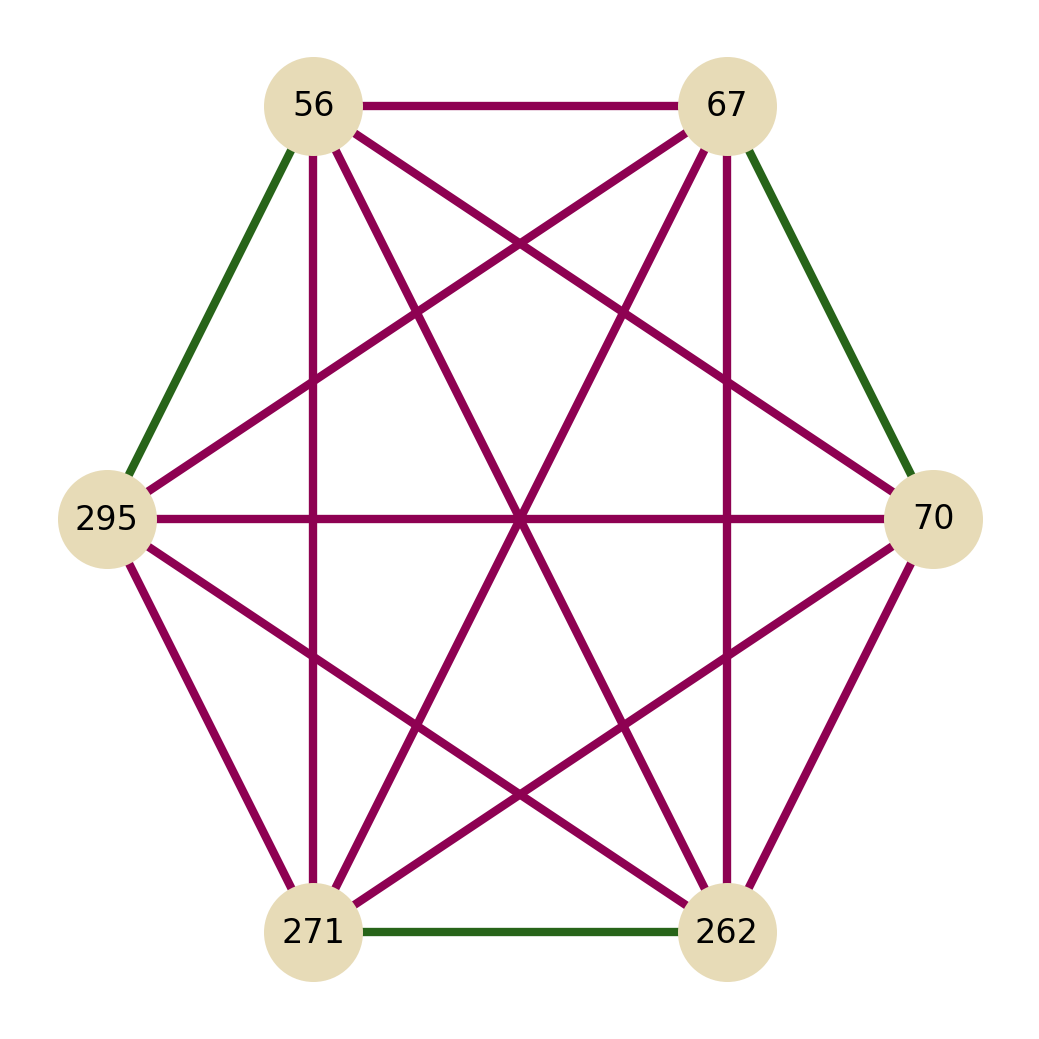

In [360]:
CMAP = plt.get_cmap("PiYG")

BSA_BONDS = [
    (b - 1, e - 1)
    for b, e in [
        (53, 62),
        (75, 91),
        (90, 101),
        (123, 168),
        (167, 176),
        (199, 245),
        (244, 252),
        (264, 278),
        (277, 288),
        (315, 360),
        (359, 368),
        (391, 437),
        (436, 447),
        (460, 476),
        (475, 486),
        (513, 558),
        (557, 566),
    ]
]

LYS_BONDS = [(5, 126), (29, 114), (63, 79), (75, 93)]

LIP_BONDS = [(56, 295), (67, 70), (262, 271)]

OVA_BONDS = [(72, 119)]

# IDEAL GRAPH
g = nx.complete_graph(reversed(cysteines[3:] + cysteines[:3]))
plt.figure(figsize=(5, 5), dpi=200)

edges = [tuple(sorted(e)) for e in g.edges()]
scores = [e in LIP_BONDS for e in edges]
scores_normalized = [
    abs(s - min(scores)) / abs(max(scores) - min(scores)) for s in scores
]
colors = [CMAP(s) for s in scores_normalized]

nx.draw_circular(
    g,
    with_labels=True,
    node_size=1200,
    node_color="#E7DBB7",
    edge_color=colors,
    width=3,
)

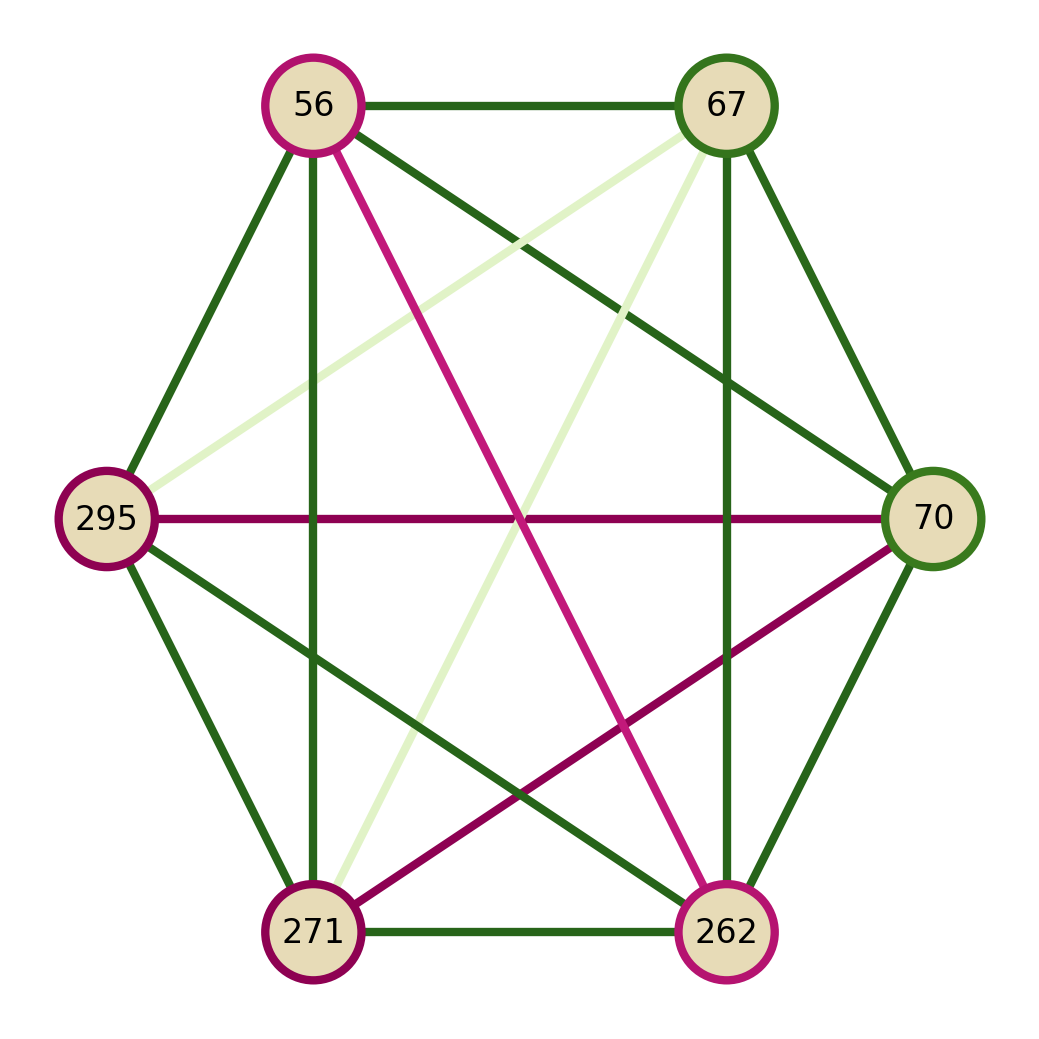

In [370]:
nodes = list(reversed(cysteines[3:] + cysteines[:3]))
g = nx.complete_graph(nodes)
plt.figure(figsize=(5, 5), dpi=200)


def intersects(t1, t2):
    return t1[0] in t2 or t1[1] in t2


def odds(e, positive, alkylation):
    alkylated = alkylation[e[0]] + alkylation[e[1]]
    if positive[e] > alkylated:
        return positive[e] / (alkylated + 0.1)
    else:
        return -alkylated / (positive[e] + 0.1)


edges = [tuple(sorted(e)) for e in g.edges()]
scores = [
    (
        e,
        odds(e, positive_evidence, alkylation_score) ** 9,
    )
    for e in edges
]


def normalize(x, xs):
    return abs(x - min(xs)) / abs(max(xs) - min(xs))


scores_normalized = [
    normalize(
        s,
        [n for f, n in scores if intersects(e, f)],
    )
    for e, s in scores
]
edge_colors = [CMAP(s) for s in scores_normalized]

node_scores = [(alkylation_score[n]) for n in nodes]
node_scores_normalized = [
    abs(s - min(positive_evidence.values()))
    / abs(max(positive_evidence.values()) - min(positive_evidence.values()))
    for s in node_scores
]
node_colors = [CMAP(s) for s in node_scores_normalized]


nx.draw_circular(
    g,
    with_labels=True,
    node_size=1200,
    node_color="#E7DBB7",
    linewidths=3,
    edgecolors=node_colors,
    edge_color=edge_colors,
    width=3,
)

# nodes = list(reversed(cysteines[3:] + cysteines[:3]))
# g = nx.complete_graph(nodes)
# plt.figure(figsize=(5, 5), dpi=200)
#
# edges = [tuple(sorted(e)) for e in g.edges()]
# scores = [(positive_evidence[e]) - negative_evidence[e] for e in edges]
# scores_normalized = [
#     abs(s - min(scores)) / abs(max(scores) - min(scores)) for s in scores
# ]
# edge_colors = [CMAP(s) for s in scores_normalized]
#
# node_scores = [(alkylation_score[n]) * 0.5 for n in nodes]
# node_scores_normalized = [
#     abs(s - min(positive_evidence.values()))
#     / abs(max(positive_evidence.values()) - min(positive_evidence.values()))
#     for s in node_scores
# ]
# node_colors = [CMAP(s) for s in node_scores_normalized]
#
#
# nx.draw_circular(
#     g,
#     with_labels=True,
#     node_size=1200,
#     node_color="#E7DBB7",
#     linewidths=3,
#     edgecolors=node_colors,
#     edge_color=edge_colors,
#     width=3,
# )